C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loc

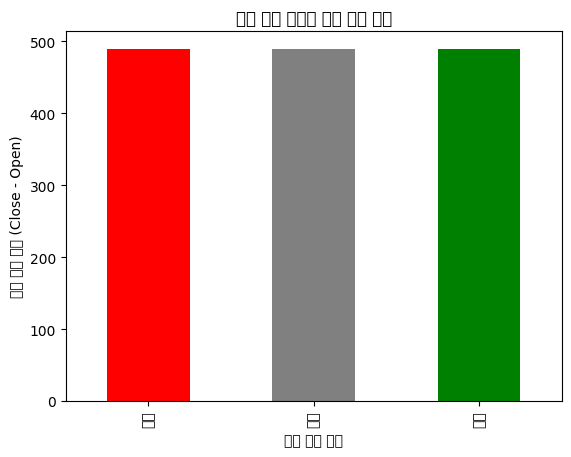

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 결합된 데이터 로드
df = pd.read_csv("C:/pthon_basic/webcrolingProject/news_crawler_project/data/merged_news_stock.csv")

# 주가 변동 계산 (종가 - 시가)
df["주가 변동"] = df["Close"] - df["Open"]

# 감성 분석 결과별 주가 변동 평균 계산
sentiment_analysis = df.groupby("감성 분석 결과")["주가 변동"].mean()

# 그래프 출력
sentiment_analysis.plot(kind="bar", color=["red", "gray", "green"])
plt.title("감성 분석 결과별 평균 주가 변동")
plt.xlabel("감성 분석 결과")
plt.ylabel("평균 주가 변동 (Close - Open)")
plt.show()


In [7]:
import pandas as pd

# 결합된 데이터 로드
df = pd.read_csv("C:/pthon_basic/webcrolingProject/news_crawler_project/data/merged_news_stock.csv")

# '주가 변동' 컬럼 추가
df["주가 변동"] = df["Close"] - df["Open"]

# 감성별 주가 변동 평균 출력
print(df.groupby("감성 분석 결과")["주가 변동"].mean())

# 감성별 뉴스 개수 확인
print(df["감성 분석 결과"].value_counts())


감성 분석 결과
긍정    489.425946
부정    489.425946
중립    489.425946
Name: 주가 변동, dtype: float64
감성 분석 결과
중립    35
부정     6
긍정     5
Name: count, dtype: int64


In [8]:
import pandas as pd

# ✅ 데이터 경로 설정
DATA_PATH = "C:/pthon_basic/webcrolingProject/news_crawler_project/data/"

# ✅ 뉴스 데이터 로드
news_df = pd.read_csv(DATA_PATH + "naver_news.csv")

# ✅ 감성 분석 함수 (간단한 예시, 더 발전 가능!)
def get_sentiment(text):
    if "상승" in text or "호재" in text or "성공" in text or "강세" in text:
        return "긍정"
    elif "하락" in text or "악재" in text or "실패" in text or "약세" in text:
        return "부정"
    else:
        return "중립"

# ✅ 감성 분석 적용
news_df["감성 분석 결과"] = news_df["본문"].apply(get_sentiment)

# ✅ 감성 분석된 뉴스 데이터 저장
news_df.to_csv(DATA_PATH + "sentiment_naver_news.csv", index=False)

print("✅ 감성 분석 완료! (저장 경로: data/sentiment_naver_news.csv)")


✅ 감성 분석 완료! (저장 경로: data/sentiment_naver_news.csv)


In [9]:
# ✅ 데이터 로드
news_df = pd.read_csv(DATA_PATH + "sentiment_naver_news.csv")
stock_data = pd.read_csv(DATA_PATH + "stock_data.csv")

# ✅ 날짜 형식 변환
news_df["날짜"] = pd.to_datetime(news_df["날짜"])
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

# ✅ 뉴스와 주가 데이터 병합 (날짜 기준)
merged_df = pd.merge(news_df, stock_data, left_on="날짜", right_on="Date", how="inner")

# ✅ 결합된 데이터 저장
merged_df.to_csv(DATA_PATH + "merged_news_stock.csv", index=False)

print("✅ 뉴스 데이터와 주가 데이터 결합 완료! (저장 경로: data/merged_news_stock.csv)")


✅ 뉴스 데이터와 주가 데이터 결합 완료! (저장 경로: data/merged_news_stock.csv)


In [10]:
import pandas as pd

# ✅ 데이터 로드
DATA_PATH = "C:/pthon_basic/webcrolingProject/news_crawler_project/data/"
news_df = pd.read_csv(DATA_PATH + "sentiment_naver_news.csv")
stock_data = pd.read_csv(DATA_PATH + "stock_data.csv")

# ✅ 날짜 범위 출력
print("📅 뉴스 데이터 날짜 범위:", news_df["날짜"].min(), "~", news_df["날짜"].max())
print("📅 주가 데이터 날짜 범위:", stock_data["Date"].min(), "~", stock_data["Date"].max())


📅 뉴스 데이터 날짜 범위: 2025.03.10. ~ 2025.03.11.
📅 주가 데이터 날짜 범위: 2024-01-02 ~ 2024-03-08


In [11]:
import yfinance as yf
import pandas as pd

# ✅ 삼성전자(005930.KQ) 주가 데이터 가져오기 (2025년)
stock_data = yf.download("005930.KQ", start="2025-01-01", end="2025-03-11")

# ✅ 날짜 인덱스를 컬럼으로 변환
stock_data.reset_index(inplace=True)

# ✅ 데이터 저장
DATA_PATH = "C:/pthon_basic/webcrolingProject/news_crawler_project/data/"
stock_data.to_csv(DATA_PATH + "stock_data.csv", index=False)

print("✅ 2025년 주가 데이터 다운로드 완료! (저장 경로: data/stock_data.csv)")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

✅ 2025년 주가 데이터 다운로드 완료! (저장 경로: data/stock_data.csv)


In [12]:
# ✅ 데이터 로드
news_df = pd.read_csv(DATA_PATH + "sentiment_naver_news.csv")
stock_data = pd.read_csv(DATA_PATH + "stock_data.csv")

# ✅ 날짜 형식 변환
news_df["날짜"] = pd.to_datetime(news_df["날짜"])
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

# ✅ 뉴스와 주가 데이터 병합 (날짜 기준)
merged_df = pd.merge(news_df, stock_data, left_on="날짜", right_on="Date", how="inner")

# ✅ 결합된 데이터 저장
merged_df.to_csv(DATA_PATH + "merged_news_stock.csv", index=False)

print("✅ 뉴스 데이터와 주가 데이터 결합 완료! (저장 경로: data/merged_news_stock.csv)")
print("🔍 병합된 데이터 개수:", len(merged_df))


✅ 뉴스 데이터와 주가 데이터 결합 완료! (저장 경로: data/merged_news_stock.csv)
🔍 병합된 데이터 개수: 2


C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loc

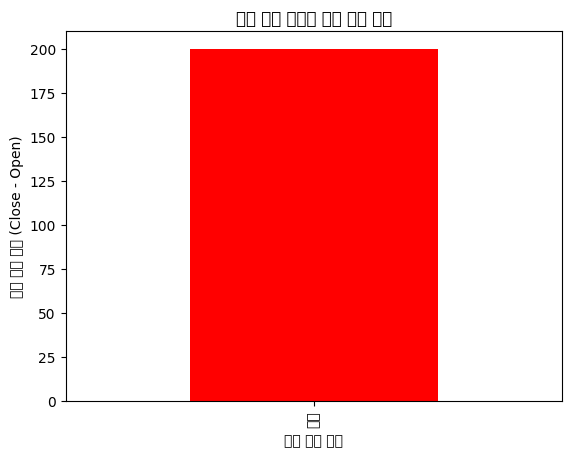

In [13]:
import matplotlib.pyplot as plt

# ✅ 데이터 로드
DATA_PATH = "C:/pthon_basic/webcrolingProject/news_crawler_project/data/"
df = pd.read_csv(DATA_PATH + "merged_news_stock.csv")

# ✅ 주가 변동 계산 (종가 - 시가)
df["주가 변동"] = df["Close"] - df["Open"]

# ✅ 감성 분석 결과별 평균 주가 변동 계산
sentiment_analysis = df.groupby("감성 분석 결과")["주가 변동"].mean()

# ✅ 그래프 출력
sentiment_analysis.plot(kind="bar", color=["red", "gray", "green"])
plt.title("감성 분석 결과별 평균 주가 변동")
plt.xlabel("감성 분석 결과")
plt.ylabel("평균 주가 변동 (Close - Open)")
plt.show()
